In [1]:
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Recession'] = data['Recession'].astype(int)

report_types = ['Yearly Statistics', 'Recession Period Statistics']
years = [str(i) for i in range(1980, 2024)]

app.layout = html.Div(children=[
    html.H1(children='Automobile Sales Statistics Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 24}),

    dcc.Dropdown(id='dropdown-statistics', options=[{'label': report, 'value': report} for report in report_types], value='Yearly Statistics', style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}),

    dcc.Dropdown(id='select-year', options=[{'label': year, 'value': year} for year in years], placeholder='Select Year', style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'color': 'black', 'textAlignLast': 'center'}),

    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
    
    html.Div(id='analysis-output')
])

@app.callback(
    Output('select-year', 'disabled'),
    [Input('dropdown-statistics', 'value')]
)
def toggle_select_year_dropdown(selected_report):
    return selected_report != 'Yearly Statistics'

@app.callback(
    Output('output-container', 'children'),
    [Input('dropdown-statistics', 'value'), Input('select-year', 'value')]
)
def update_graphs(selected_report, selected_year):
    children = []
    if selected_report == 'Yearly Statistics':
        yearly_sales = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        fig = px.line(yearly_sales, x='Year', y='Automobile_Sales', title='Yearly Automobile Sales')
        children.append(dcc.Graph(figure=fig))
    elif selected_report == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        fig = px.line(recession_data, x='Year', y='Automobile_Sales', color='Vehicle_Type', title='Sales by Vehicle Type During Recession')
        children.append(dcc.Graph(figure=fig))
    
    return children

@app.callback(
    Output('analysis-output', 'children'),
    [Input('dropdown-statistics', 'value')]
)
def analyze_vehicle_type_sales(selected_report):
    if selected_report == 'Recession Period Statistics':
        recession_sales_by_type = data[data['Recession'] == 1].groupby('Vehicle_Type')['Automobile_Sales'].mean()
        differences = recession_sales_by_type.diff().dropna()
        noticeable_difference = "Yes" if any(differences.abs() > differences.mean()) else "No"
        data_table = differences.to_frame(name='Difference').reset_index()
        return [
            html.P(f"Is there a noticeable difference in sales trends between different vehicle types during recession periods? {noticeable_difference}"),
            dash_table.DataTable(
                columns=[{"name": i, "id": i} for i in data_table.columns],
                data=data_table.to_dict('records'),
                style_cell={'textAlign': 'left'},
                style_header={
                    'backgroundColor': 'white',
                    'fontWeight': 'bold'
                },
                filter_action="native",
                sort_action="native",
                sort_mode="multi",
                page_action="native",
                page_current=0,
                page_size=10,
            )
        ]
    return ""

if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

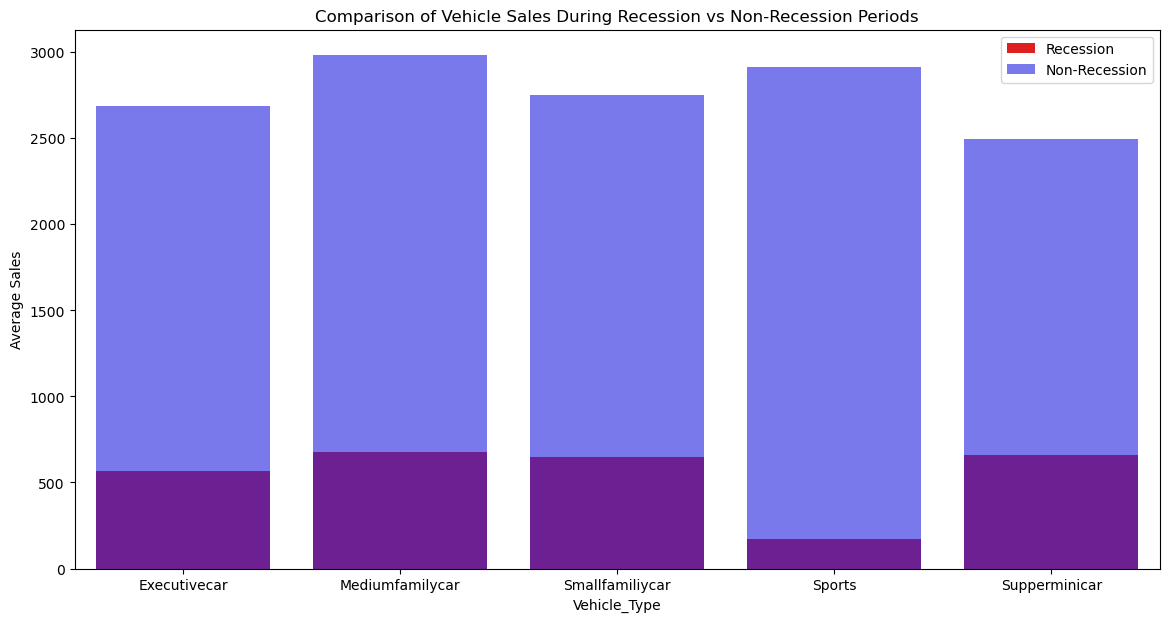

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)

# Filter data for recession and non-recession periods
recession_data = data[data['Recession'] == 1]
non_recession_data = data[data['Recession'] == 0]

# Group by Vehicle_Type and calculate the mean Automobile_Sales for recession and non-recession
vehicle_sales_recession = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
vehicle_sales_non_recession = non_recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()

# Merge the recession and non-recession dataframes on Vehicle_Type
merged_sales = pd.merge(vehicle_sales_recession, vehicle_sales_non_recession, on='Vehicle_Type', suffixes=('_recession', '_non_recession'))

# Plot using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales_recession', data=merged_sales, color='red', label='Recession')
sns.barplot(x='Vehicle_Type', y='Automobile_Sales_non_recession', data=merged_sales, color='blue', alpha=0.6, label='Non-Recession')

plt.title('Comparison of Vehicle Sales During Recession vs Non-Recession Periods')
plt.ylabel('Average Sales')
plt.legend()
plt.show()

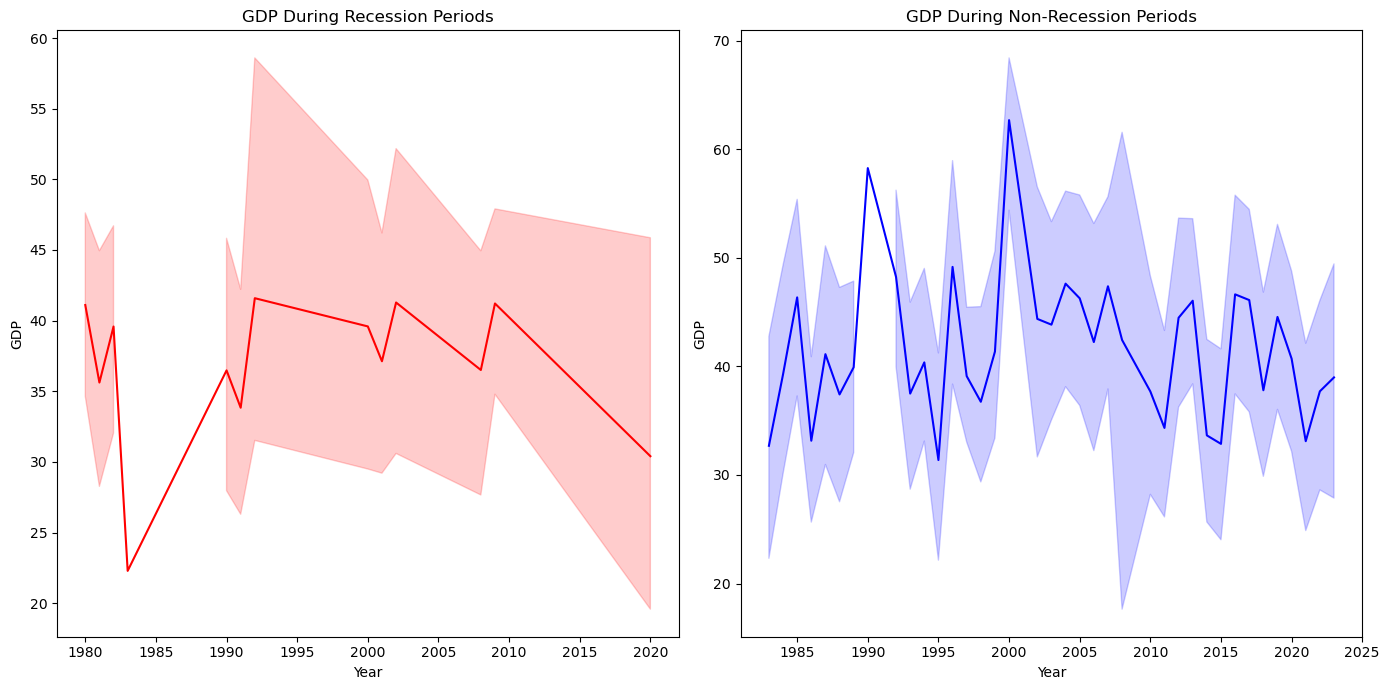

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)

# Split the data into recession and non-recession periods
recession_data = data[data['Recession'] == 1]
non_recession_data = data[data['Recession'] == 0]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Recession data plot
sns.lineplot(data=recession_data, x='Year', y='GDP', ax=axes[0], color='red')
axes[0].set_title('GDP During Recession Periods')
axes[0].set_ylabel('GDP')
axes[0].set_xlabel('Year')

# Non-Recession data plot
sns.lineplot(data=non_recession_data, x='Year', y='GDP', ax=axes[1], color='blue')
axes[1].set_title('GDP During Non-Recession Periods')
axes[1].set_ylabel('GDP')
axes[1].set_xlabel('Year')

# Adjust layout and plot
plt.tight_layout()
plt.savefig('Subplot.png')
plt.show()


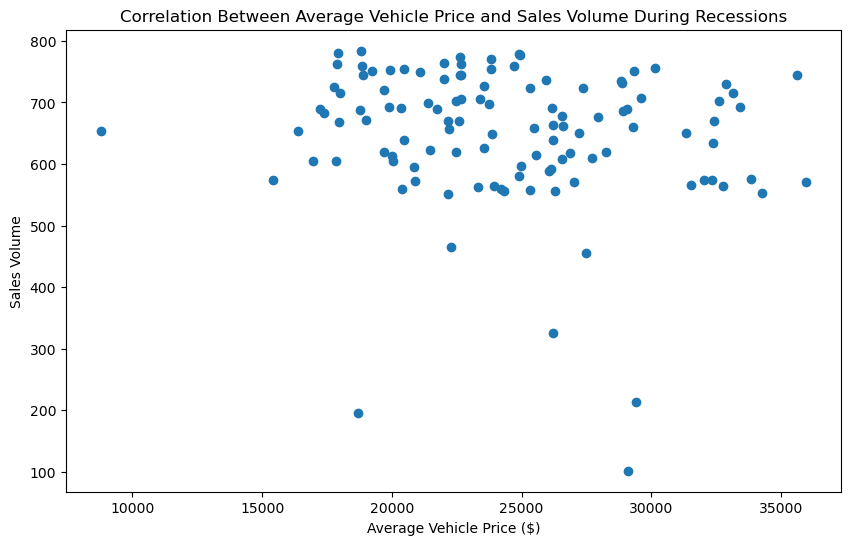

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)

# Filter the data to only include recession periods
recession_data = data[data['Recession'] == 1]

# Create a scatter plot of average vehicle price vs sales volume
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])

# Labeling the plot
plt.title('Correlation Between Average Vehicle Price and Sales Volume During Recessions')
plt.xlabel('Average Vehicle Price ($)')
plt.ylabel('Sales Volume')

# Save the figure
plt.savefig('Scatter.png')

# Show the plot
plt.show()


In [ ]:
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Recession'] = data['Recession'].astype(int)

report_types = ['Yearly Statistics', 'Recession Period Statistics', 'Advertising Expenditure', 'Advertisement Expenditure by Vehicle Type During Recession']
years = [str(i) for i in range(1980, 2024)]

app.layout = html.Div(children=[
    html.H1(children='Automobile Sales Statistics Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 24}),
    dcc.Dropdown(id='dropdown-statistics', options=[{'label': report, 'value': report} for report in report_types], value='Yearly Statistics', style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}),
    dcc.Dropdown(id='select-year', options=[{'label': year, 'value': year} for year in years], placeholder='Select Year', style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'color': 'black', 'textAlignLast': 'center'}),
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
    html.Div(id='analysis-output')
])

@app.callback(
    Output('select-year', 'disabled'),
    [Input('dropdown-statistics', 'value')]
)
def toggle_select_year_dropdown(selected_report):
    return selected_report != 'Yearly Statistics'

@app.callback(
    Output('output-container', 'children'),
    [Input('dropdown-statistics', 'value'), Input('select-year', 'value')]
)
def update_graphs(selected_report, selected_year):
    children = []
    if selected_report == 'Yearly Statistics':
        yearly_sales = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        fig = px.line(yearly_sales, x='Year', y='Automobile_Sales', title='Yearly Automobile Sales')
        children.append(dcc.Graph(figure=fig))
    elif selected_report == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        fig = px.line(recession_data, x='Year', y='Automobile_Sales', color='Vehicle_Type', title='Sales by Vehicle Type During Recession')
        children.append(dcc.Graph(figure=fig))
    elif selected_report == 'Advertising Expenditure':
        ad_expenditure = data.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()
        fig = px.pie(ad_expenditure, values='Advertising_Expenditure', names='Recession', title='Advertising Expenditure During Recession vs Non-Recession')
        children.append(dcc.Graph(figure=fig))
    elif selected_report == 'Advertisement Expenditure by Vehicle Type During Recession':
        recession_ad_expenditure = data[data['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        fig = px.pie(recession_ad_expenditure, values='Advertising_Expenditure', names='Vehicle_Type', title='Advertisement Expenditure by Vehicle Type During Recession')
        children.append(dcc.Graph(figure=fig))
    return children

@app.callback(
    Output('analysis-output', 'children'),
    [Input('dropdown-statistics', 'value')]
)
def analyze_vehicle_type_sales(selected_report):
    if selected_report == 'Recession Period Statistics':
        recession_sales_by_type = data[data['Recession'] == 1].groupby('Vehicle_Type')['Automobile_Sales'].mean()
        differences = recession_sales_by_type.diff().dropna()
        noticeable_difference = "Yes" if any(differences.abs() > differences.mean()) else "No"
        data_table = differences.to_frame(name='Difference').reset_index()
        return [
            html.P(f"Is there a noticeable difference in sales trends between different vehicle types during recession periods? {noticeable_difference}"),
            dash_table.DataTable(
                columns=[{"name": i, "id": i} for i in data_table.columns],
                data=data_table.to_dict('records'),
                style_cell={'textAlign': 'left'},
                style_header={
                    'backgroundColor': 'white',
                    'fontWeight': 'bold'
                },
                filter_action="native",
                sort_action="native",
                sort_mode="multi",
                page_action="native",
                page_current=0,
                page_size=10,
            )
        ]
    return ""

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Recession'] = data['Recession'].astype(int)

# Filter for the year 1980 and recession period
data_1980_recession = data[(data['Year'] == 1980) & (data['Recession'] == 1)]

app.layout = html.Div(children=[
    html.H1(children='1980 Recession Period Vehicle Sales', style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 24}),
    dcc.Graph(
        figure=px.line(data_1980_recession, x='Date', y='Automobile_Sales', color='Vehicle_Type', title='1980 Recession Period Vehicle Sales')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Recession'] = data['Recession'].astype(int)

# Filter for the year 1980 and recession period
data_1980_recession = data[(data['Year'] == 1980) & (data['Recession'] == 1)]

app.layout = html.Div(children=[
    html.H1(children='1980 Recession Period Vehicle Sales', style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 24}),
    html.Div(id='output-div', className='output-class', children=[
        dcc.Graph(
            figure=px.line(data_1980_recession, x='Date', y='Automobile_Sales', color='Vehicle_Type', title='1980 Recession Period Vehicle Sales')
        )
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Recession'] = data['Recession'].astype(int)

report_types = ['Yearly Statistics', 'Recession Period Statistics']
years = [str(i) for i in range(1980, 2024)]

app.layout = html.Div(children=[
    html.H1(children='Automobile Sales Statistics Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 24}),

    dcc.Dropdown(id='dropdown-statistics', options=[{'label': report, 'value': report} for report in report_types], value='Yearly Statistics', style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}),

    dcc.Dropdown(id='select-year', options=[{'label': year, 'value': year} for year in years], placeholder='Select Year', style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'color': 'black', 'textAlignLast': 'center'}),

    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
    
    html.Div(id='analysis-output')
])

@app.callback(
    Output('select-year', 'disabled'),
    [Input('dropdown-statistics', 'value')]
)
def toggle_select_year_dropdown(selected_report):
    return selected_report != 'Yearly Statistics'

@app.callback(
    Output('output-container', 'children'),
    [Input('dropdown-statistics', 'value'), Input('select-year', 'value')]
)
def update_graphs(selected_report, selected_year):
    children = []
    if selected_report == 'Yearly Statistics':
        yearly_sales = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        fig = px.line(yearly_sales, x='Year', y='Automobile_Sales', title='Yearly Automobile Sales')
        children.append(dcc.Graph(figure=fig))
    elif selected_report == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        fig = px.line(recession_data, x='Year', y='Automobile_Sales', color='Vehicle_Type', title='Sales by Vehicle Type During Recession')
        children.append(dcc.Graph(figure=fig))
    
    return children

@app.callback(
    Output('analysis-output', 'children'),
    [Input('dropdown-statistics', 'value')]
)
def analyze_vehicle_type_sales(selected_report):
    if selected_report == 'Recession Period Statistics':
        recession_sales_by_type = data[data['Recession'] == 1].groupby('Vehicle_Type')['Automobile_Sales'].mean()
        differences = recession_sales_by_type.diff().dropna()
        noticeable_difference = "Yes" if any(differences.abs() > differences.mean()) else "No"
        data_table = differences.to_frame(name='Difference').reset_index()
        return [
            html.P(f"Is there a noticeable difference in sales trends between different vehicle types during recession periods? {noticeable_difference}"),
            dash_table.DataTable(
                columns=[{"name": i, "id": i} for i in data_table.columns],
                data=data_table.to_dict('records'),
                style_cell={'textAlign': 'left'},
                style_header={
                    'backgroundColor': 'white',
                    'fontWeight': 'bold'
                },
                filter_action="native",
                sort_action="native",
                sort_mode="multi",
                page_action="native",
                page_current=0,
                page_size=10,
            )
        ]
    return ""




if __name__ == '__main__':
    app.run_server(debug=True)
